## Simulação de rede QKD na topologia de rede da China

In [1]:
# Dependências
from components import Network, Controller
from components.qkd.app import *
import numpy as np

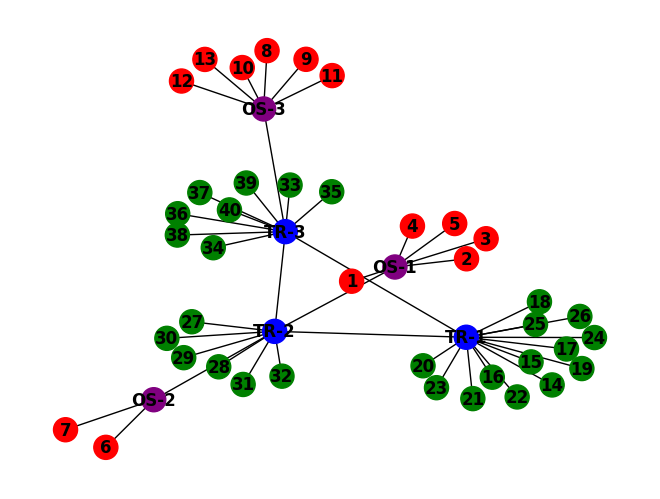

In [2]:
# Definindo rede e controlador
rede = Network()
rede.set_china_topology()
controlador = Controller(rede)
rede.newDraw()

In [3]:
def formatar_planilha():
    apps = ["BB84", "E91", "B92"]
    routes_calculation_type = 'kshortest'
    numero_requests = [500, 600, 700, 800, 900, 1000]
    n_simulacoes = 5
    caso = 1
    for request in numero_requests:
        vazao, taxa = run_simulations(rede, controlador, n_simulacoes, request, apps, caso, routes_calculation_type)
        media_vazao = np.mean(vazao)
        desvio_padrao_vazao = np.std(vazao)
        print(f'=SPLIT("{formatar_numero(media_vazao)} {formatar_numero(desvio_padrao_vazao)}"; " ")')

In [4]:
formatar_planilha()

=SPLIT("0,2485491 0,0319215"; " ")
